<a href="https://colab.research.google.com/github/harryo583/harryo583/blob/main/hw1_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CS 449 Deep Learning Homework 1

There are 20 points possible for this assignment. The due date for this assignment is shown on Canvas.

## Academic Integrity

While the project and some future assignments may be completed in groups,
**this assignment must be completed alone**.  Do not submit someone else's work
as your own, and do not allow someone else to submit your work as their own.
Do not use ChatGPT or other LLMs for this assignment.  If we find sufficiently
suspicious similarities between your answers and those of another student, you
may both be reported for a suspected violation.  If you're unsure of the
academic integrity policies, ask for help; we can help you avoid breaking the
rules, but we can't un-report a suspected violation.

By submitting this assignment, you agree to these rules, and understand that
there may be severe consequences for violating them.


## Important Instructions

While we provide this GitHub repo for you, your work must be uploaded to **Canvas**
for us to grade it. You must upload two files

1. your final `hw1.ipynb` notebook with outputs saved. If we run your notebook
  from scratch, it should produce an output identical to your PDF. You can edit
  your notebook however you want (on Colab, on your local machine, somewhere
  else); just upload the latest version of it to Canvas.

1. a `hw1.pdf` printout of the completed notebook that shows all your answers.
  If you open Jupyter Notebook locally, the `File > Download as > PDF via LaTeX (.pdf)`
  often produces the best PDFs, but as long as we can read all your answers,
  any approach is fine.
  [This blog post suggests a few options.](https://mljar.com/blog/jupyter-notebook-pdf/)

See the `README.md` provided with this assignment for the full instructions.


# Part 1: Loss functions (8 points)

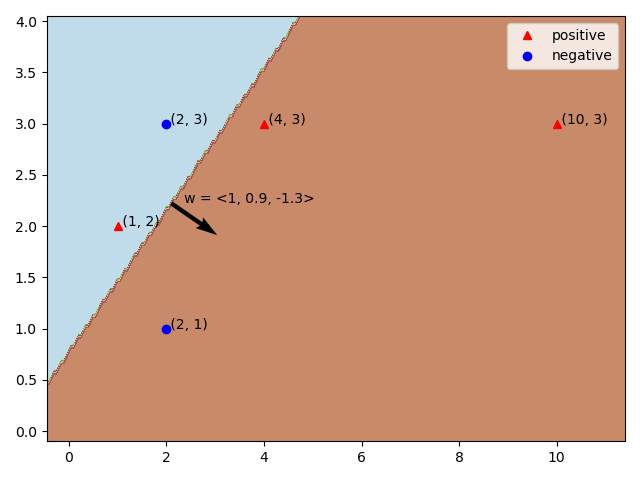

Consider the linear classifier with the weights and decision boundary above. Define $g({\bf X}) =  {\bf Xw}$. We'll define our classification prediction $h({\bf X}) = \text{sign}(g({\bf X}))$. You can assume the sign (not sine) function is [implemented as in numpy](https://numpy.org/doc/stable/reference/generated/numpy.sign.html). Using the parameters $\mathbf{w} = \langle 1, 0.9, -1.3 \rangle$ shown above, we can calculate $g(X)$ and $h(X)$ as:

$\begin{array}{c r r r}
{\bf X} & y & g({\bf X}) & h({\bf X}) \\
\hline
(1, 2) &  1  & -0.7 &  -1 \\
(2, 1) &  -1 & 1.5  &  1   \\
(2, 3) &  -1 & -1.1 &  -1  \\
(4, 3) &  1  & 0.7  &  1   \\
(10, 3)&  1  & 6.1  &  1
\end{array}$

Right now, the classifier gets 60% accuracy. We want to think about how different loss functions could help the model improve.

In class, we've discussed the perceptron loss and mean squared error as ways of evaluating the quality of model predictions. First, read up on [Hinge loss](https://en.wikipedia.org/wiki/Hinge_loss) and [Binary Cross Entropy loss](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) to understand how those work. We include definitions below, but it'll be helpful to understand the "margin" aspect of hinge loss and the probabilistic interpretation of BCE loss.

Using our $g({\bf X})$ definition above, we can define each loss as the following:

1. Perceptron (zero-one) loss:

$L(x, y) = \begin{cases}
0 & \text{if } y \cdot g({\bf x}) > 0 \\
1 & \text{otherwise}
\end{cases} \\[2em]$

2. Squared error loss:

$L(x, y) = (y - g({\bf x}))^2 \\[2em]$

3. Binary cross-entropy loss (written in an atypical way):

$L(x, y) = \begin{cases}
\ln\left(1 + \exp(-g({\bf x}))\right) & \text{ if } y > 0 \\
\ln\left(1 + \exp(g({\bf x}))\right) & \text{ if } y < 0
\end{cases} \\[2em]$

4. Hinge loss:

$L(x, y) = \max\left(0, 1 - y \cdot g({\bf x})\right) \\[1em]$

For each loss, answer the following questions. You must provide an explanation for full points.

 - a. For this loss, which point(s) have the highest loss value? Why?

 - b. For this loss, which point(s) have the lowest loss value? Why?

 - c. With this dataset and loss, is it possible to find a different set of model parameters ${\bf w'}$ that would have a lower total loss? Don't calculate the loss for any specific ${\bf w'}$ values; just look at the plot and use your intuition. You may answer "Yes", "No", or "Maybe":
    - If you answer "Yes", give a general description of what the new decision boundary would look like and why that would decrease the loss (e.g., "if you rotated the current boundary clockwise, then ...").
    - If you answer "No", give a general argument for why there is no decision boundary that could decrease the loss.
    - If you answer "Maybe", give a general description of a new decision boundary that *might* decrease the loss, but it's hard to tell without doing the calculations. Also, provide a general argument for why there's no decision boundary that *obviously* decreases the loss.

 - d. Is this loss function a good choice for training a *multilayer* perceptron on a binary classification task? Why or why not?

## *Please add your answers into the structure below. You shouldn't need to write or run code for these answers.*

1. Perceptron loss

  a. (1,2) and (2,1) have a highest value of 1. Since the loss value is either 0 or 1, points that are on the wrong side of the decision boundary (misclassified) have the highest loss of 1.

  b. (2,3), (4,3), (10,3) all have a lowest value of 0. Since the loss value is either 0 or 1, points that are on the correct side of the decision boundary (correctly classified) have the lowest loss of 0.

  c. Yes. If you push the decision boundary to the left (or rotate slightly clockwise) such that the point (1,2) is in the positive region and (2,3) becomes the only point in the negative region, we can achieve a lower total loss because now 4 out of 5 points are classified correctly (as opposed to 3). This way the total loss is reduced from 2 to 1.

  d. No. The perception loss function is kinked when plotted, meaning that it is non-differentiable at the point (0). It is also flat when x is not zero, and so have a gradient of zero almost everywhere. It is therefore not suited for gradient descent as the loss function is not inclined and will not lead to improvement in the update step.


2. Squared error loss

  a. (10,3) has the highest loss of 5.1^2 = 26.01 because the output g(x) is farthest away from the true label 1 (even though it is correctly classified).

  b. (2,3) has the lowest loss value of 0.1^2 = 0.01 because the output g(x) is closest to the true label -1 (it is correctly classified and very close to -1).

  c. Yes. If the decision boundary is rotated clockwise about a pivot at around x = 1 then the total loss might be improved because the squared distance between the decision boundary and the point (10,3) is now significantly lowered. Since square loss worsens faster when distance is large, this shift should reduce the loss of that point by a significant amount while only slightly worsening the loss contributed by other points.

  d. It can be used because it is everywhere differentiable and leads to a global minimum, but it's not the best for binary classification tasks because it penalizes over-confident predictions even when they are right (e.g. a correctly computed output of 1000 will be penalized even though)


3. Binary cross entropy loss

  a. (2,1) has the highest loss value of ln(1 + e^1.5) = 1.70.

  b. (10,3) has the lowest loss value of ln(1 + e^-6.1) = 0.00224.

  c. Is is hard to tell by looking at the plot alone but it's possible that a slight counterclockwise rotation would improve the loss at (2,1) without penalizing (1,3) too much more. It's also possible that since such rotation would almost inevitably increase the loss at (1,3) that the overall loss won't improve by much.

  d. It is very suitable because it is differentiable everywhere and provides useful gradient information that inclines to one global minimum.



4. Hinge loss

  a. (2,1) has the highest loss value of 2.5 because it is incorrectly classified and has the furthest linear distance from the true label of -1.

  b. (2,3) and (10,3) both have the lowest loss value of 0 because they are both on the correctly classified and have |g(x)| > 1, meaning they are "strongly positive" or "strongly negatively". This confidence is rewarded by hinge loss.

  c. Total loss might improve if the decision boundary is rotated slightly counterclockwise, reducing the loss at points like (2,1) which currently contributes a significant amount to the total loss.

  d. It is suitable because it is differentiable almost everywhere (except at 1 or -1) and provides a nice stable gradient everywhere else until it flattens out when the point gets correctly classified. It encourages the model to increase the margin between the decision boundary and the points and therefore is a good loss function.

# Part 2: Experiments with Pretraining (12 points)

If you are having difficulty installing pytorch locally, please [follow the instructions here](https://pytorch.org/get-started/locally/) or in the `README.md`.

Before you start editing the code, please read through the cells below to get a sense of how we're setting up these experiments. You're welcome to take notes. Then, you can run all the cells. The questions you need to answer are found at the bottom of the notebook.

In [ ]:
# Choose basedir as either local or hosted directory
import os
if "COLAB_BACKEND_VERSION" in os.environ:
    base_dir = "/content"
else:
    base_dir = os.getcwd()
%cd $base_dir

import torch
import numpy as np

import copy
import random

from collections import defaultdict
from sklearn.model_selection import train_test_split

need_to_install = False
try:
    from utils.plotting import *  # see plotting.py for plotting utilities

except ModuleNotFoundError as e:
    if os.path.isdir(os.path.join(base_dir, "lectures")):
        raise e
    else:
        print("Cloning helper repo")
        !git clone https://github.com/cs449f24/lectures.git lectures/
        %cd $base_dir/lectures/
        !git pull -q origin main
        from utils.plotting import *

/content
Cloning helper repo
Cloning into 'lectures'...
remote: Enumerating objects: 268, done.
remote: Counting objects: 100% (268/268), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 268 (delta 136), reused 261 (delta 130), pack-reused 0 (from 0)
Receiving objects: 100% (268/268), 24.15 MiB | 8.17 MiB/s, done.
Resolving deltas: 100% (136/136), done.
Updating files: 100% (50/50), done.
/content/lectures


In [ ]:
# Create two datasets

def make_multiple_circles(radii, examples_per_ring, std=0.1,):
    """
    A dataset of concentric circles of alternating labels
    """
    assert type(radii) in [list, tuple, np.ndarray]

    X = np.zeros([0, 2])
    y = np.zeros([0,])

    for i, radius in enumerate(radii):
        # Rings alternate as labeled -1 or 1
        y_ = np.ones([examples_per_ring]) * (-1) ** i
        y = np.concatenate([y, y_], axis=0)

        # Create a ring of points with radii centered at radius
        #   but in any random angle from the origin
        r = radius + np.random.normal(0, std, examples_per_ring)
        theta = np.random.uniform(0, 2 * np.pi, examples_per_ring)

        # Convert (r, theta) coordinates to cartesian
        x0 = r * np.sin(theta)
        x1 = r * np.cos(theta)
        x_ = np.stack([x0, x1], axis=1)
        X = np.concatenate([X, x_], axis=0)

    return X, y.astype(int)


def make_spiral(n):
    """
    Yet another spiral dataset
    """
    y0 = np.zeros(n)
    y1 = np.ones(n)
    y = np.concatenate([y0, y1], axis=0).astype(int)
    z = np.concatenate(2 * [np.linspace(0, 4 * np.pi, n)], axis=0)

    x0 = z * np.sin(z + y * np.pi)
    x1 = z * np.cos(z + y * np.pi)
    X = np.stack([x0, x1], axis=1)

    y[y == 0] = -1

    return X, y


def numpy_to_tensor(lst):
    """
    Convert numpy array to torch tensor
    """
    if type(lst) == np.ndarray:
        return torch.tensor(lst).to(dtype=torch.float32)

    else:
        out = [torch.tensor(item).to(dtype=torch.float32) for item in lst]
        return tuple(out)

In [ ]:
class HW1Net(torch.nn.Module):
    def __init__(self, layer_sizes=[], activation=torch.tanh):
        """
        Construct a simple neural network.

        Args:
         - layer_sizes: a list or tuple of hidden layer sizes. For example,
                        if layer_sizes = [4, 4], this will be a network
                        with linear layers with dimensions[2, 4], [4, 4], [4, 2]
         - activation:  a torch activation function
        """
        super().__init__()

        input_dims = (2, ) + tuple(layer_sizes)
        output_dims = tuple(layer_sizes) + (2, )
        dims = zip(input_dims, output_dims)

        self.activation = activation
        self.layers = []
        for i, (input_dim, output_dim) in enumerate(dims):
            # Create and initialize the layer
            layer = torch.nn.Linear(input_dim, output_dim)
            torch.nn.init.xavier_uniform_(layer.weight)
            self.layers.append(layer)

            # Register this layer so Pytorch tracks its parameters
            setattr(self, f"layer{i}", layer)

    def forward(self, x):
        n_layers = len(self.layers)
        for i, layer in enumerate(self.layers):
            x = layer(x)
            # Activation on everything but the final layer
            if i + 1 < n_layers:
                x = self.activation(x)

        return x

In [ ]:
def run_one_epoch(model, optimizer, X, y, train=True):

    if train:
        model.train()
        optimizer.zero_grad()
    else:
        model.eval()

    output = model(X).squeeze()
    binary_targets = torch.where(y > 0, 1, 0)
    acc = torch.sum(torch.argmax(output, dim=1) == binary_targets) / y.size(0)
    loss = torch.nn.CrossEntropyLoss()(output, binary_targets)

    if train:
        loss.backward()
        optimizer.step()

    # Detach tells torch to stop tracking a tensor's gradients
    return acc.detach(), loss.detach()

In [ ]:
def pretrain_and_train(pretrain_data, data, **kwargs):

    # Create the model and set up the optimizer
    model = HW1Net(
        layer_sizes=kwargs["layer_sizes"],
        activation=kwargs["activation"],
    )
    optimizer = torch.optim.Adam(model.parameters(), lr=kwargs["learning_rate"])

    # Pretrain the model and save a copy of the pretrained model
    X, y = pretrain_data
    for _ in range(kwargs["n_pretrain_epochs"]):
        run_one_epoch(model, optimizer, X, y)
    pretrained_model = copy.deepcopy(model)

    # Train the model and track its performance over each epoch
    results = defaultdict(list)
    X_train, X_test, y_train, y_test = data
    for i in range(kwargs["n_train_epochs"]):
        train_acc, train_loss = run_one_epoch(
            model, optimizer, X_train, y_train)

        test_acc, test_loss = run_one_epoch(
            model, None, X_test, y_test, train=False)

        results["train_acc"].append(train_acc)
        results["test_acc"].append(test_acc)
        results["train_loss"].append(train_loss)
        results["test_loss"].append(test_loss)

    return pretrained_model, model, results

In [ ]:
def make_prediction_function(model):
    """
    Our network outputs real-valued logits
    When we make final predictions, those should be +1 or -1
    """
    def predict(X):
        X = numpy_to_tensor(X)
        output = model(X).detach()
        binary_pred = np.argmax(output, axis=1)
        return np.where(binary_pred > 0, 1, -1)

    return predict


def plot_results(pretrained_model, trained_model,
                pretrain_data, data,
                results, title):
    """
    Given a (saved) pretrained model, our final trained model,
        the pretrained data, train and test data,
        and a dictionary of results,

    Build the six-panel figure that you'll use to show off your results.
    """
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 12),
                             constrained_layout=True)

    X_pretrain, y_pretrain = pretrain_data
    X_train, X_test, y_train, y_test = data

    # Top right panel
    ax = axes[0, 1]
    ax.set_title("Pretrained Model on Train Data")
    plot_data(X_train, y_train, ax)
    predict = make_prediction_function(pretrained_model)
    plot_decision_surface(predict, ax.axis(), ax=ax)

    # Top left panel
    ax = axes[0, 0]
    ax.set_title("Pretrained Model on Pretrain Data")
    plot_data(X_pretrain, y_pretrain, ax)
    axes[0, 0].set_ylim(axes[0, 1].get_ylim())
    axes[0, 0].set_xlim(axes[0, 1].get_xlim())
    predict = make_prediction_function(pretrained_model)
    plot_decision_surface(predict, ax.axis(), ax=ax)

    # Middle left panel
    ax = axes[1, 0]
    ax.set_title("Trained Model on Train Data")
    plot_data(X_train, y_train, ax)
    predict = make_prediction_function(trained_model)
    plot_decision_surface(predict, ax.axis(), ax=ax)

    # Middle right panel
    ax = axes[1, 1]
    ax.set_title("Trained Model on Test Data")
    plot_data(X_test, y_test, ax)
    predict = make_prediction_function(trained_model)
    plot_decision_surface(predict, ax.axis(), ax=ax)

    # Bottom left
    ax = axes[2, 0]
    ax.set_title("Loss per Epoch")
    train_loss = results["train_loss"]
    test_loss = results["test_loss"]
    n_epochs = len(train_loss)
    ax.plot(np.arange(n_epochs), train_loss, c='r', label='Train Loss')
    ax.plot(np.arange(n_epochs), test_loss, c='b', label='Test Loss')
    ax.legend(loc="best")
    ymin, ymax = ax.get_ylim()
    ax.set_ylim(ymin, 2 * ymax)

    # Bottom right
    ax = axes[2, 1]
    ax.set_title("Accuracy per Epoch")
    train_acc = results["train_acc"]
    test_acc = results["test_acc"]
    n_epochs = len(train_acc)
    ax.plot(np.arange(n_epochs), train_acc, c='r', label='Train Acc')
    ax.plot(np.arange(n_epochs), test_acc, c='b', label='Test Acc')
    ax.legend(loc="best")
    ax.set_ylim(0, 1.1)

    final_accuracy = np.mean(test_acc[-10:])
    final_accuracy = f"Final mean test acc: {100 * final_accuracy:.1f}%"
    ax.annotate(final_accuracy, xy=(0, 0.1),
                textcoords="data", fontsize=16)

    plt.suptitle(title, fontsize=24)
    plt.show()

In [ ]:
def run_experiment(**kwargs):
    """
    Required kwargs:
    - title:                A name for this experiment

    - radii:                radii of rings in the multiple_circles dataset
    - examples_per_ring:    number of examples per ring

    - layer_sizes:          number of nodes per hidden layer in network
    - activation:           activation function for each hidden layer
    - learning_rate:        learning rate for SGD optimization
    - n_pretrain_epochs:    how many epochs to pretrain
    - n_train_epochs:       how many epochs to train
    """
    random.seed(1)
    np.random.seed(1)
    torch.manual_seed(1)

    pretrain_data = make_multiple_circles(
        radii=kwargs['radii'], examples_per_ring=kwargs['examples_per_ring']
    )
    pretrain_data = numpy_to_tensor(pretrain_data)

    # Do not change the number of spiral examples!
    spiral_data = make_spiral(32)
    spiral_data = numpy_to_tensor(train_test_split(*spiral_data, test_size=0.2, random_state=1))

    pretrained_model, trained_model, results = pretrain_and_train(
        pretrain_data, spiral_data, **kwargs)

    plot_results(pretrained_model, trained_model,
                 pretrain_data, spiral_data,
                 results, kwargs["title"])

In [ ]:
# Example experiment; you should copy this cell several times,
#   edit the kwargs, and save the figure outputs to your notebook.

kwargs = {
    "title": "Overfitting Experiment",
    "radii": (2, 6, 10),
    "examples_per_ring": 100,
    "layer_sizes": [300, 200, 100],
    "activation": torch.tanh,
    "learning_rate": 0.001,
    "n_pretrain_epochs": 100,
    "n_train_epochs": 1000,
}


# 38.5
# kwargs = {
#     "title": "Example Experiment",
#     "radii": (2, 6, 10),
#     "examples_per_ring": 100,
#     "layer_sizes": [100, 10],
#     "activation": torch.tanh,
#     "learning_rate": 0.001,
#     "n_pretrain_epochs": 100,
#     "n_train_epochs": 1000,
# }

run_experiment(**kwargs)

## Q2.1 Understanding the Code (2 points)

  1. In the `run_one_epoch` function, the code uses a combination of `where`, `argmax`, and `torch.nn.CrossEntropyLoss`. How do these calculations work with the model's output to compute the loss and accuracy? Why does the model output a real-valued tensor of shape `(N, 2)`?
    You may want to look at the [documentation for the loss function](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html).

.

  2. Read through the `run_experiment`, `pretrain_and_train`, and `plot_results` functions to understand how the figure is being built. In your own words, describe in general what the six panels show. What data is being used in which panels?

> *Please put your answers to "Understanding the Code" here*
>
> 1. where converts the output to a binary target format (0,1) so binary cross entropy loss can be computed; argmax converts logits into class label by selecting the class with greater confidence; CrossEntropyLoss computes the negative log likelihood of the confidence logits for the label class. The model outputs a real valued tensor of shape (N, 2) because each datapoint has two logits that represent the confidence of labeling the point as each class.
>
> 2.
  1. Top left (pretrained model on pretrain data): shows how the model trained on ring data performs on the ring data it's trained on
  2. Top right (pretrained model on train data): shows how the model trained on ring data performs on spiral training data
  3. Middle left (trained model on train data): shows how the model pretrained on ring data and then trained on spiral data performs on the spiral training data
  4. Middle right (trained model on test data): shows how the model pretrained on ring data and then trained on spiral data performs on spiral test data
  5. Bottom left (loss per epoch): shows how the loss evolves in the training process over epochs
  6. Bottom right (accuracy per epoch): shows the accuracy evolves in the training process over epochs
?

## Q2.2 Experiments and Discussion (6 points)

The example experiment we provide has the following keyword arguments:

```
kwargs = {
    "title": "Example Experiment",
    "radii": (2, 6, 10),
    "examples_per_ring": 100,
    "layer_sizes": [100, 10],
    "activation": torch.tanh,
    "learning_rate": 0.001,
    "n_pretrain_epochs": 100,
    "n_train_epochs": 1000,
}
```

For your experiments, you should change these values and rerun `run_experiment(**kwargs)` and track what happens. You can run as many or as few experiments as you want, but they should have unique `title` values (i.e., not "Example Experiment"), and your written answers to the following questions should reference the figures produced by specific experiments. That is, don't say "the model tends to overfit"; say "in my `Example #4` above, we can see that the model is overfitting because ...". You can copy the example experiment we provide into new Code cells, edit the kwargs, and run the cell to save the output to your notebook.

1. **Overfitting Experiments** (2 points)

    Include at least two experiments that show the model overfitting.
    Describe what those experiments show and how you know the model is
    overfitting. What arguments had the most effect on whether your
    model overfits?

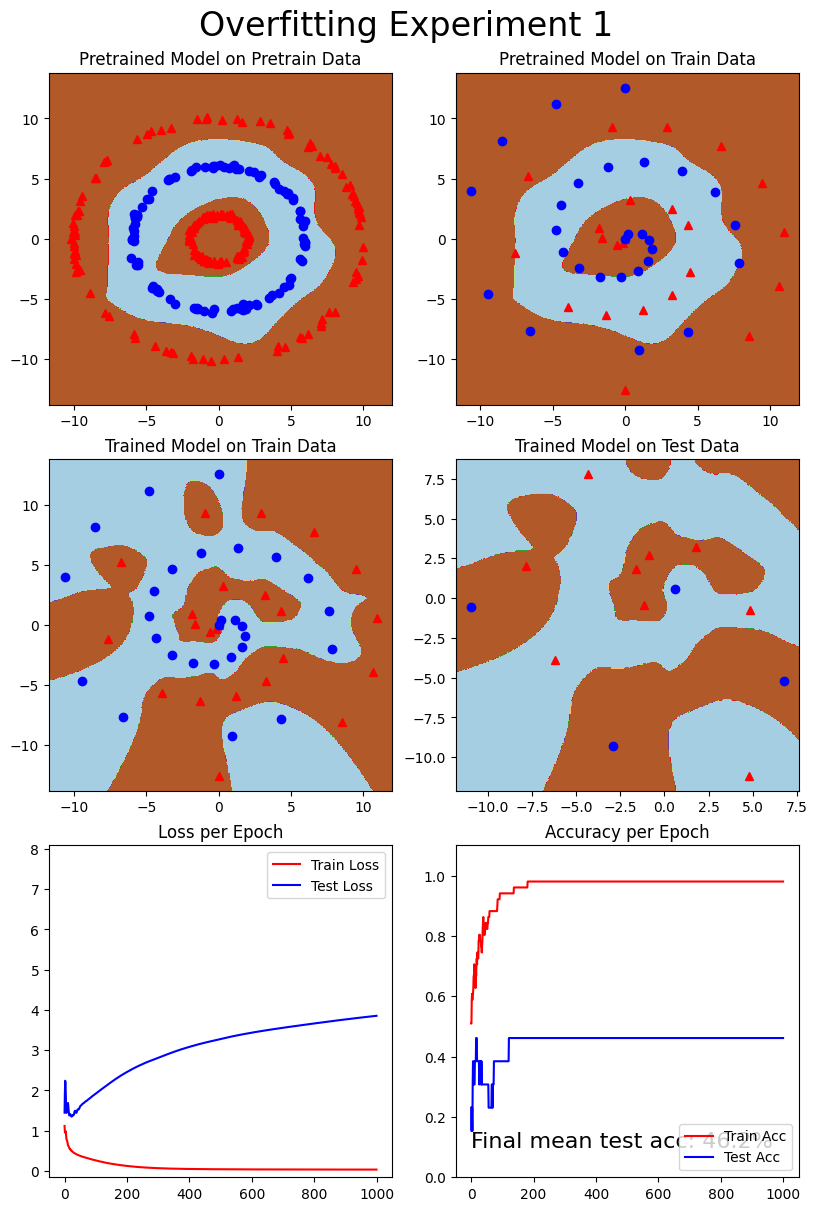

In [ ]:
kwargs = {
    "title": "Overfitting Experiment 1",
    "radii": (2, 6, 10),
    "examples_per_ring": 100,
    "layer_sizes": [300, 300],
    "activation": torch.tanh,
    "learning_rate": 0.001,
    "n_pretrain_epochs": 100,
    "n_train_epochs": 1000,
}
run_experiment(**kwargs)

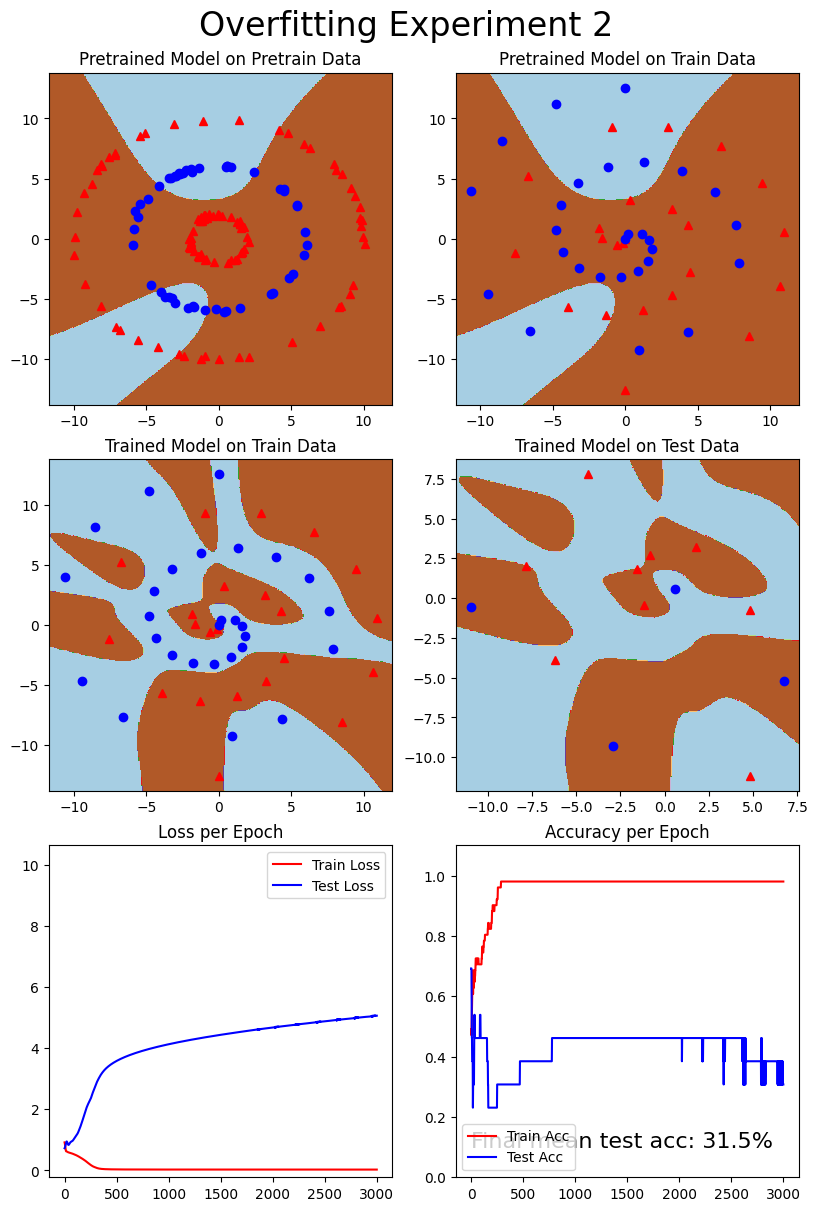

In [ ]:
kwargs = {
    "title": "Overfitting Experiment 2",
    "radii": (2, 6, 10),
    "examples_per_ring": 50,
    "layer_sizes": [100, 10, 10, 10],
    "activation": torch.tanh,
    "learning_rate": 0.001,
    "n_pretrain_epochs": 100,
    "n_train_epochs": 3000,
}
run_experiment(**kwargs)


- In the first overfitting experiment, I increased the width of the layers to 300, 300 and observed a high generalization error of around 50% (~100% training accuracy and 46.2% testing accuracy). In the second experiment, I increased the depth of the layers to [100, 10, 10, 10] (adding two more layers) and increased the number of epochs to 3000. This further reduced the test accuracy to 31.5%. In both instances, the middle-row plots show that the model is learning to fit the specific data points instead of the spiral shape. This is because the model is too complex, allowing it to fit anything, and in the second experiment, too many epochs were used to train a model with sparsely populated data points, causing it to learn the specificities of the training set distribution.

2. **Pretraining Experiments** (2 points)

    The point of pretraining is to get the model "started" with an easier task (rings) so it can more quickly learn the task we care about (spirals). You can control the amount of ring data, the amount of spiral data, and the number of epochs the model train on each. In your experiments, assume that all we care about is maximizing the final mean test set accuracy.

    Based on your experiments, **when does pretraining help? When does it hurt?**

    Your answer should be at least two paragraphs and reference at least three different experiments you ran.

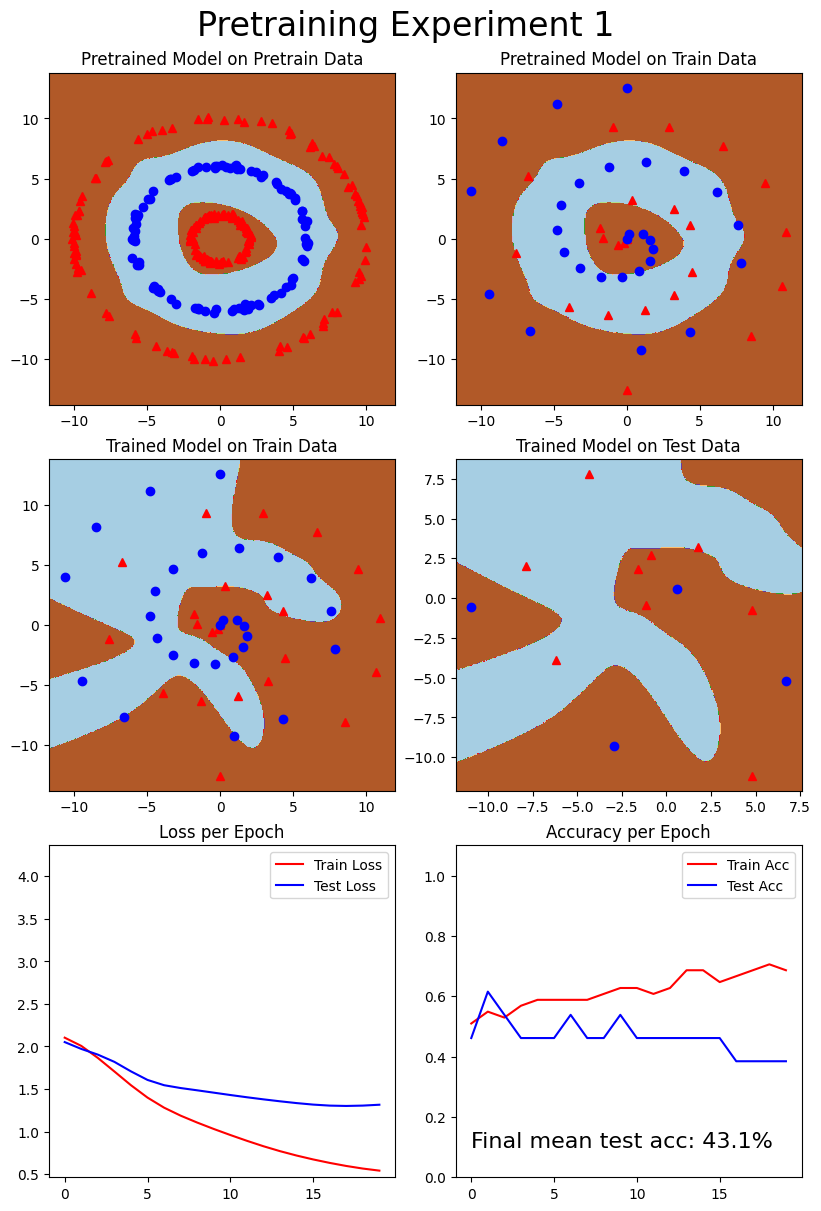

In [ ]:
kwargs = {
    "title": "Pretraining Experiment 1 - more pretraining epochs",
    "radii": (2, 6, 10),
    "examples_per_ring": 100,
    "layer_sizes": [100, 10],
    "activation": torch.tanh,
    "learning_rate": 0.001,
    "n_pretrain_epochs": 800,
    "n_train_epochs": 20,
}
run_experiment(**kwargs)

- In this experiment, I devoted a large number of epochs to pretraining the model and a small number of epochs to training it. The results indicate that the model learns the data too well. Since the ring data does not conform well to the training data, pretraining is not very effective. Additionally, because we are limited to using a very shallow network, the model does not retain the pretraining distribution effectively, which further diminishes the effectiveness of pretraining.

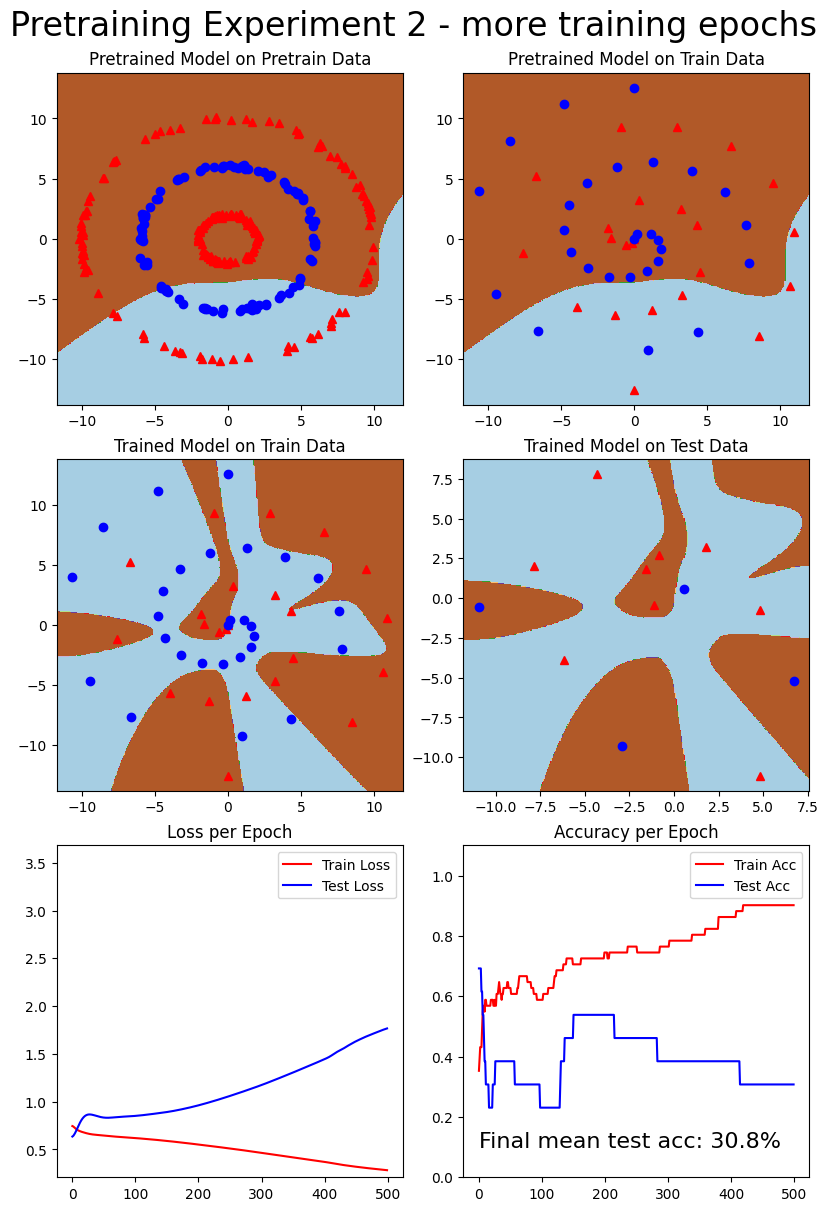

In [ ]:
kwargs = {
    "title": "Pretraining Experiment 2 - more training epochs",
    "radii": (2, 6, 10),
    "examples_per_ring": 100,
    "layer_sizes": [100, 10],
    "activation": torch.tanh,
    "learning_rate": 0.001,
    "n_pretrain_epochs": 10,
    "n_train_epochs": 500,
}
run_experiment(**kwargs)

- In this experiment, most of the epochs were used to train the model, with only a few devoted to pretraining. The results should be similar to those of a model trained without the pretraining data. In this case, we observe that the model "memorizes" the training data, and due to the sparsity of the training data, it does not perform well on the test set. This indicates that pretraining can help prevent the model from over-relying on specific data points when there is limited training data available, while the absence of pretraining may lead to overfitting.

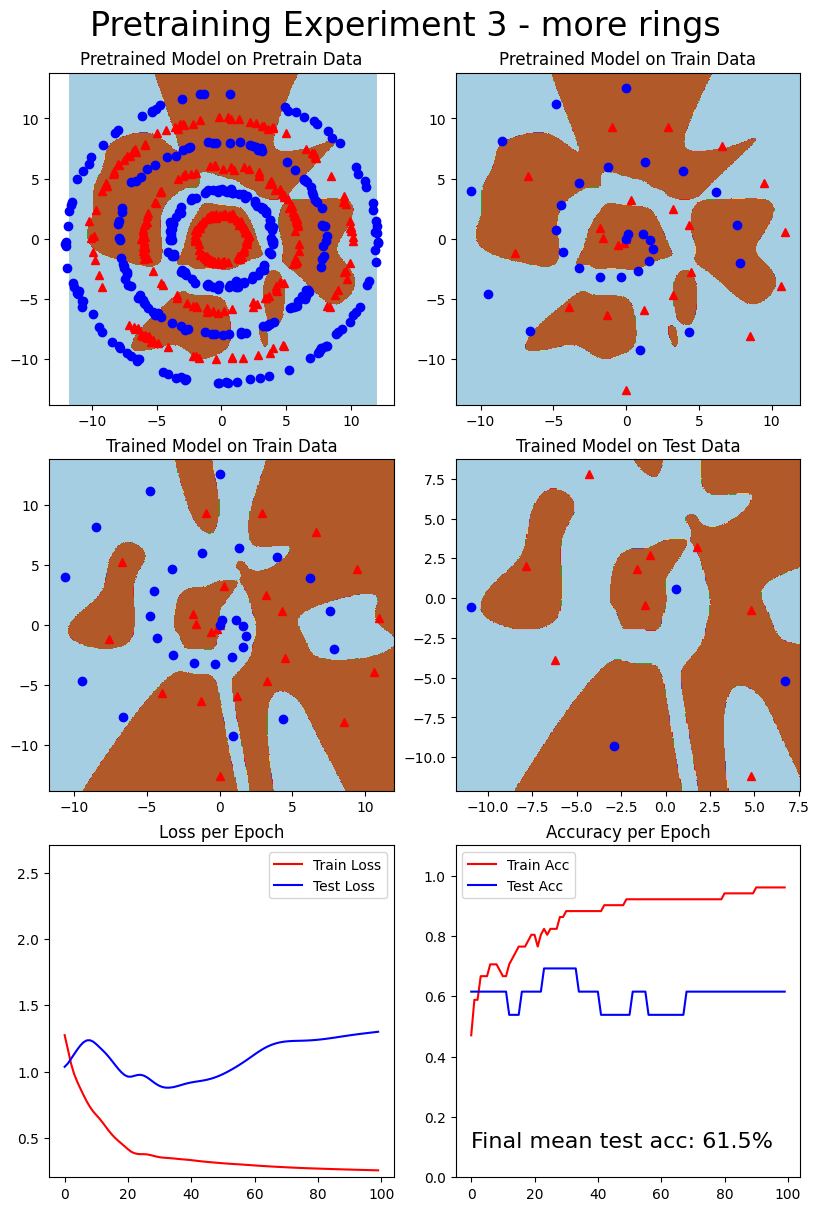

In [ ]:
kwargs = {
    "title": "Pretraining Experiment 3 - more rings",
    "radii": (2, 4, 6, 8, 10, 12),
    "examples_per_ring": 100,
    "layer_sizes": [100, 10],
    "activation": torch.tanh,
    "learning_rate": 0.001,
    "n_pretrain_epochs": 800,
    "n_train_epochs": 100,
}
run_experiment(**kwargs)

Learning from the mistakes in the first two experiments, I attempted to pretrain the model with more rings to better resemble the shape of the spirals (the number of layers of spirals should match the number of rings!) and used relatively fewer epochs for training. Although the result isn't ideal (likely due to limitations in the model's structure), the test accuracy is the highest among all the pretraining experiments.

In conclusion, pretraining is effective when:
- The pretrain data distribution resembles the distribution of the train data
- The pretrained model fits the pretrain data well (should use many pretrain epochs)
- The model is good at remembering (is deep enough) and the learning rate is not that high

3. **Best Experiment** (2 points)

    Across all the experiments you ran, with which arguments did you achieve the highest "Final mean test acc"? What patterns led you to find these arguments? Which arguments had the largest impact on your experimental results? What was more difficult than you expected?

    Your answer should be at least two paragraphs and reference at least three different experiments you ran. At least two of these experiments must be different from those included in **Pretraining Experiments** above.

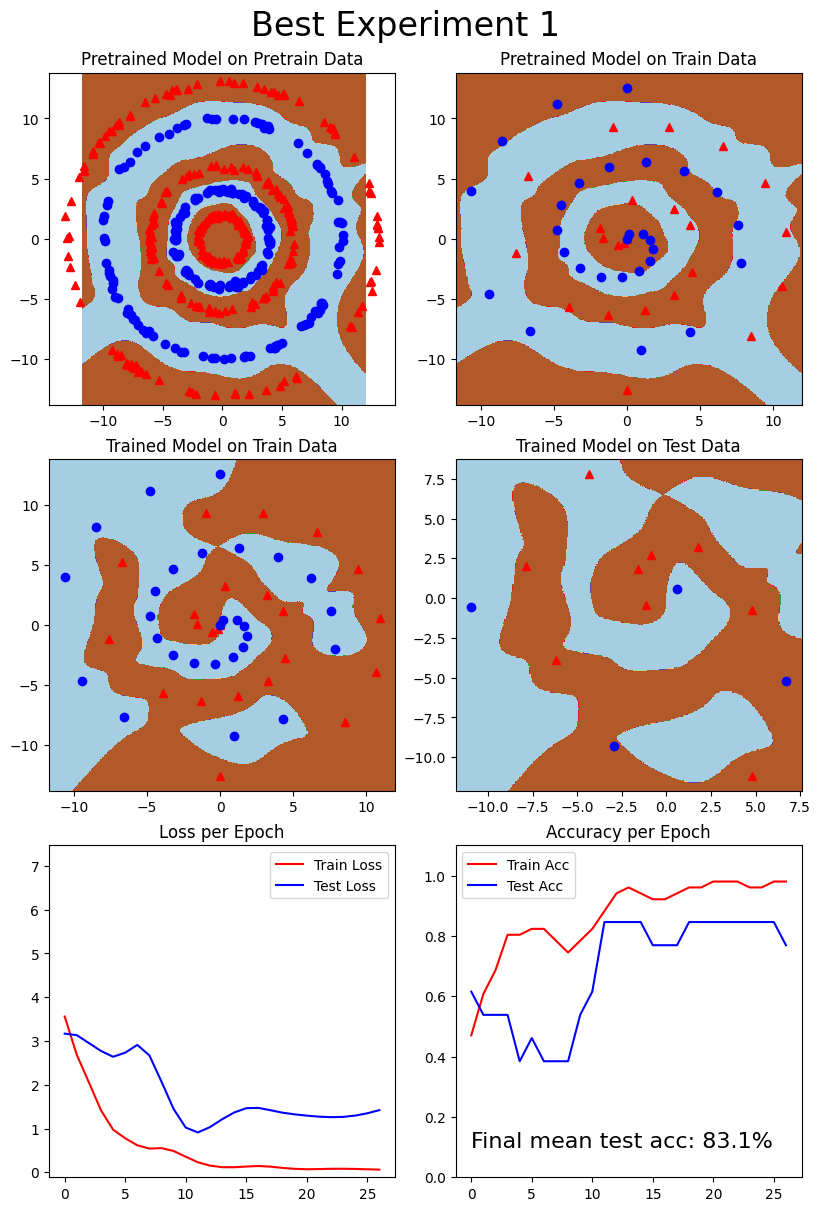

In [ ]:
kwargs = {
    "title": "Best Experiment 1",
    "radii": (2, 4, 6, 10, 13),
    "examples_per_ring": 100,
    "layer_sizes": [100, 30, 50],
    "activation": torch.tanh,
    "learning_rate": 0.001,
    "n_pretrain_epochs": 600,
    "n_train_epochs": 27,
}
run_experiment(**kwargs)

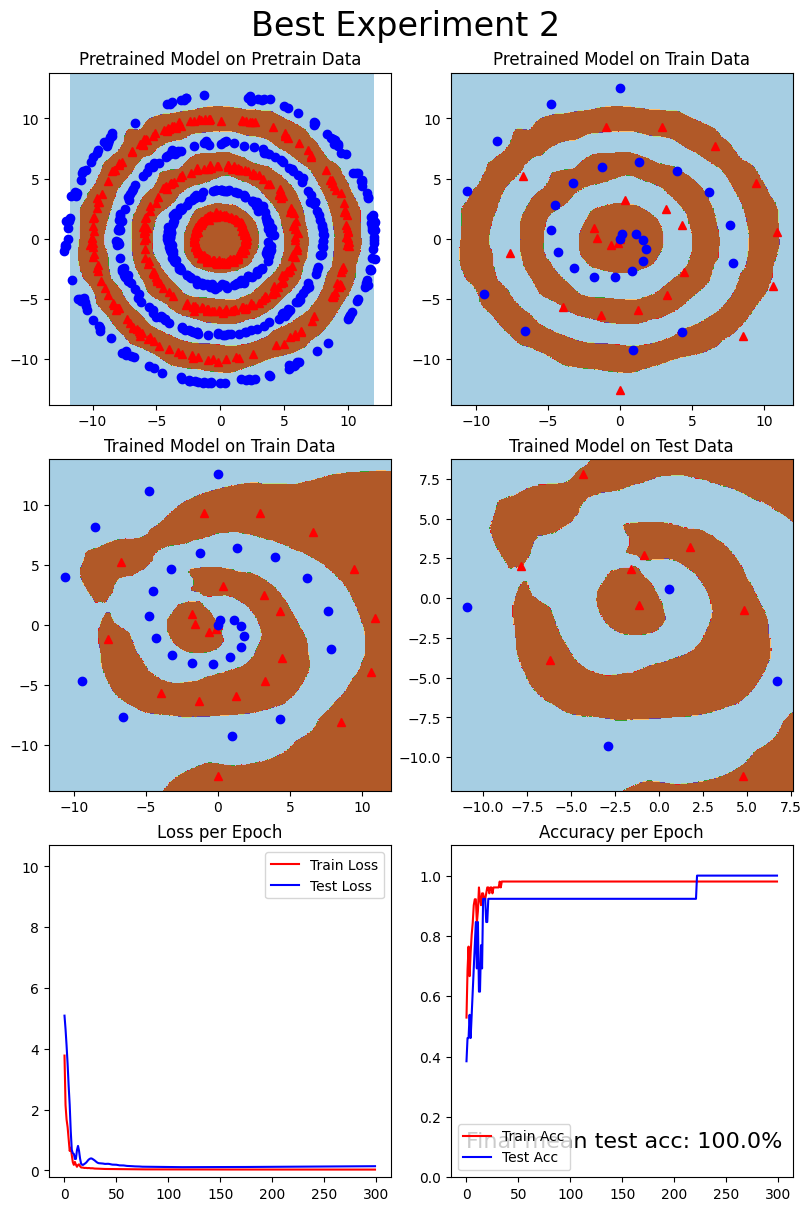

In [ ]:
kwargs = {
    "title": "Best Experiment 2",
    "radii": (2, 4, 6, 8, 10, 12),
    "examples_per_ring": 150,
    "layer_sizes": [100, 50, 50, 50],
    "activation": torch.relu,
    "learning_rate": 0.001,
    "n_pretrain_epochs": 600,
    "n_train_epochs": 300,
}
run_experiment(**kwargs)

In the first experiment, I used 5 rings during pretraining to ensure the pretrained model fits well on the pretraining data. I also reduced the layer width and slightly increased the layer depth to minimize overfitting and help the model "better remember" the pretraining data, as backpropagation requires more iterations with deeper layers. The good news is that the test accuracy has now reached 83.1%!

The second experiment is by far the best I have built. In this model, I used the 'relu' activation function instead of 'tanh' to mitigate the vanishing gradient problem common in deep learning. I also adjusted the radii of the pretraining rings so that the pretraining data more closely resembles the actual spiral data.

I allocated many epochs for pretraining to avoid the issues encountered in the second pretraining experiment. Since the network is deep, we don't face the same problems we had in "pretraining experiment 3," allowing us to safely use a large number of epochs without worrying about disrupting the beautiful spiral pattern learned by the model.

## Q2.3 Extensions and Theory (4 points)

1. **Theory of Pretraining** (2 points)

    Find two ML research papers, blog posts, or other written documents that discuss the (theoretical) differences between (a) pretraining, (b) fine-tuning, and (c) transfer learning. Link to those sources here. In your own words (for someone who hasn't taken a course on ML), how would you describe the difference between these three terms?


> A Guide to Transfer Learning: https://serokell.io/blog/guide-to-transfer-learning
> Fine Tuning vs Pre-Training: https://medium.com/@eordaxd/fine-tuning-vs-pre-training-651d05186faf

In simple terms, pretraining is when a model is trained on a large, general dataset before it is fine-tuned on a specific subset within that larger category. For instance, to train a model to recognize cancer tumors, one might first train it to learn the shapes of organs. Similarly, to develop a model for reading license plates, one might initially train it to recognize edges and shapes. Pretraining can accelerate the training process and help models develop foundational knowledge, especially when training data is limited.

Fine-tuning is the subsequent step following pretraining, where the model is trained on a specific subset to enhance its performance on a particular task. During fine-tuning, the model's weights (parameters) are often only slightly adjusted.

Transfer learning refers to the process of adapting a pretrained model for a related but different task. For example, a CNN pretrained on ImageNet can be repurposed to learn from medical images.

2. **Theory versus Practice** (2 points)

    Reflecting on the sources from the previous question, how do the theoretical pros and cons of pretraining line up with your experimental results from the rest of this assignment? Try to be as specific as possible -- are there claims from your sources that are either supported or refuted by your experimental results? If not, propose how you might expand your experiments to better test a hypothesis from a source you cited.

> According to the blog posts, pretraining on a large dataset helps a model learn general features and enhances its performance on specific tasks. It speeds up the training process by initializing the model with meaningful weights. This claim is supported by my experiment's results; as can be seen from the epoch history of the first two pretraining experiments, the model with pretraining learns much faster than the one with minimal pretraining. However, one claim that isn't reflected in the experiments is the risk of overfitting. The article mentions that if the pretrained model is too complex relative to the task at hand, it might cause overfitting and fail to adapt to the new data. However, our experiments suggest that pretraining actually reduces our dependence on the actual data and mitigates overfitting. In most respects, the theories presented in the articles align with the experimental conclusions. Pretraining can indeed speed up training and improve generalization performance.